In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ans
from scipy import stats
import statsmodels.api as sm


In [2]:
CTG = pd.read_excel("D:/stata/Python basic/BAICUOIKI/CTG.xlsx",index_col="Date", parse_dates=True)
TCB = pd.read_excel("D:/stata/Python basic/BAICUOIKI/TCB.xlsx",index_col="Date", parse_dates=True)
VCB = pd.read_excel("D:/stata/Python basic/BAICUOIKI/VCB.xlsx",index_col="Date", parse_dates=True)

In [3]:
#rename lại các cột
CTG.rename(columns={"Price": "Close", 'Vol.':'Volume', "Change %": 'Change'}, inplace=1)
TCB.rename(columns={"Price": "Close", 'Vol.':'Volume', "Change %": 'Change'}, inplace=1)
VCB.rename(columns={"Price": "Close", 'Vol.':'Volume', "Change %": 'Change'}, inplace=1)

In [4]:
#sort column
CTG.sort_values(by="Date", ascending=True, axis=0, inplace=True)
TCB.sort_values(by="Date", ascending=True, axis=0, inplace=True)
VCB.sort_values(by="Date", ascending=True, axis=0, inplace=True)

In [5]:
#chuyển đổi format cho cột volumn và cột change
VCB["Volume"].replace({"K": "*1e3", "M": "*1e6"}, inplace=True, regex=True)
VCB["Volume"] = VCB["Volume"].map(pd.eval).astype(int)
VCB["Change"].replace({"%": "*0.01"}, inplace=True, regex=True)
VCB["Change"] = VCB["Change"].map(pd.eval).astype(float)

In [6]:
TCB["Volume"].replace({"K": "*1e3", "M": "*1e6"}, inplace=True, regex=True)
TCB["Volume"] = TCB["Volume"].map(pd.eval).astype(int)
TCB["Change"].replace({"%": "*0.01"}, inplace=True, regex=True)
TCB["Change"] = TCB["Change"].map(pd.eval).astype(float)

In [7]:
CTG["Volume"].replace({"K": "*1e3", "M": "*1e6"}, inplace=True, regex=True)
CTG["Volume"] = CTG["Volume"].map(pd.eval).astype(int)
CTG["Change"].replace({"%": "*0.01"}, inplace=True, regex=True)
CTG["Change"] = CTG["Change"].map(pd.eval).astype(float)

-----------------------------------------------VẼ HÌNH, BIỂU ĐỒ--------------------------------------------

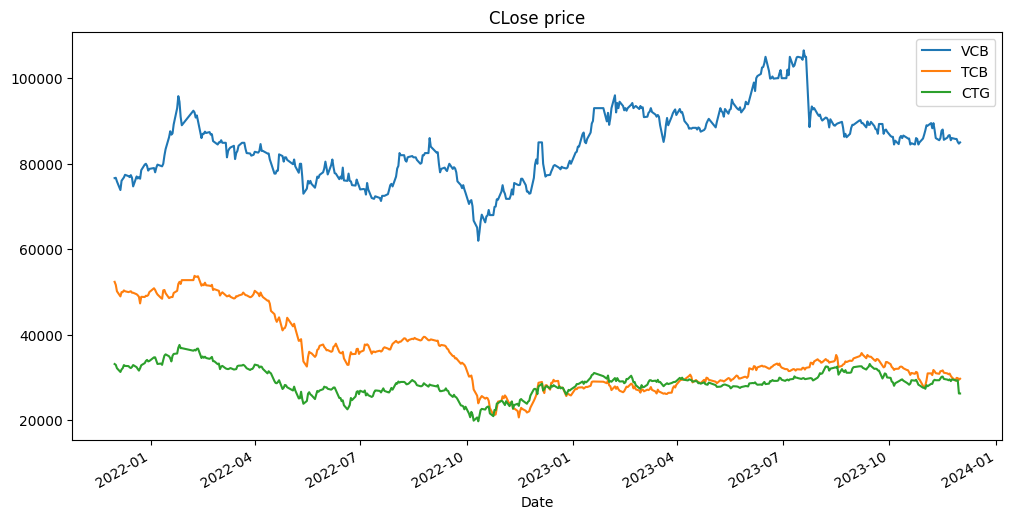

In [8]:
#vẽ plot giá đóng cửa
VCB["Close"].plot(kind='line',figsize=(12,6), title="CLose price", label ="VCB")
TCB["Close"].plot(label = "TCB")
CTG["Close"].plot(label = "CTG")
plt.legend();

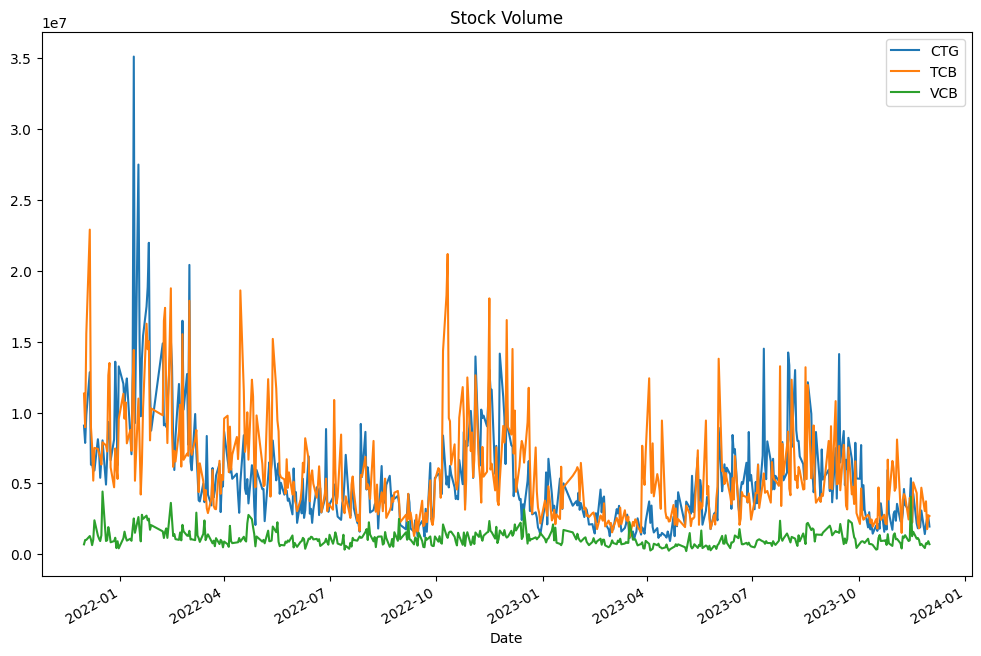

In [9]:
#plot volumE
CTG["Volume"].plot(figsize=(12,8),label="CTG",title="Stock Volume")
TCB["Volume"].plot(label="TCB")
VCB["Volume"].plot(label="VCB")
plt.legend();

In [10]:
#tính giá trị giao dịch
CTG["Trading Value"]= CTG["Close"]*CTG["Volume"]
TCB["Trading Value"]= TCB["Close"]*TCB["Volume"]
VCB["Trading Value"]= VCB["Close"]*VCB["Volume"]

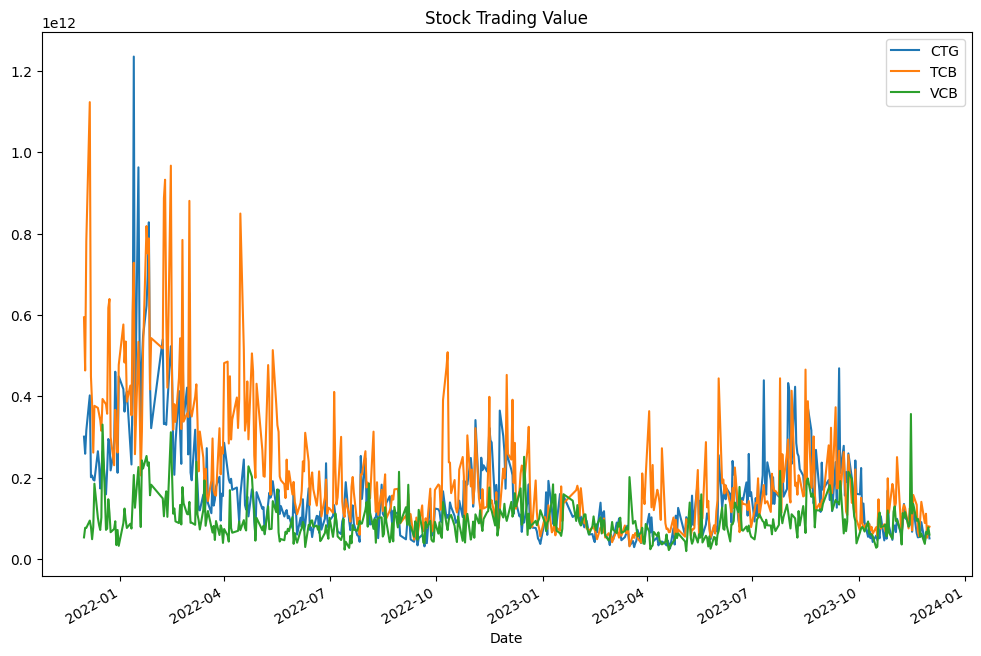

In [11]:
#plot giá trị giao dịch
CTG["Trading Value"].plot(figsize=(12,8),label="CTG",title="Stock Trading Value")
TCB["Trading Value"].plot(label="TCB")
VCB["Trading Value"].plot(label="VCB")
plt.legend();

In [12]:
#caculate moving average(hệ số trượt là 20)
CTG["20D MA"]= CTG["Close"].rolling(20).mean()
TCB["20D MA"]= TCB["Close"].rolling(20).mean()
VCB["20D MA"]= VCB["Close"].rolling(20).mean()

In [13]:
CTG["Upper Band"]=CTG["Close"].rolling(20).mean()+2*CTG["Close"].rolling(20).std()
CTG["Lower Band"]=CTG["Close"].rolling(20).mean()-2*CTG["Close"].rolling(20).std()

In [14]:
TCB["Upper Band"]=TCB["Close"].rolling(20).mean()+2*TCB["Close"].rolling(20).std()
TCB["Lower Band"]=TCB["Close"].rolling(20).mean()-2*TCB["Close"].rolling(20).std()

In [15]:
VCB["Upper Band"]=VCB["Close"].rolling(20).mean()+2*VCB["Close"].rolling(20).std()
VCB["Lower Band"]=VCB["Close"].rolling(20).mean()-2*VCB["Close"].rolling(20).std()

In [16]:
#caculate moving average(hệ số trượt là 40)
CTG["40D MA"]= CTG["Close"].rolling(40).mean()
TCB["40D MA"]= TCB["Close"].rolling(40).mean()
VCB["40D MA"]= VCB["Close"].rolling(40).mean()

In [17]:
#caculate moving average(hệ số trượt là 50)
CTG["50D MA"]= CTG["Close"].rolling(50).mean()
TCB["50D MA"]= TCB["Close"].rolling(50).mean()
VCB["50D MA"]= VCB["Close"].rolling(50).mean()

In [18]:
#caculate moving average(hệ số trượt là 100)
CTG["100D MA"]= CTG["Close"].rolling(100).mean()
TCB["100D MA"]= TCB["Close"].rolling(100).mean()
VCB["100D MA"]= VCB["Close"].rolling(100).mean()

In [19]:
#drop các giá trị missing
CTG.dropna(inplace=True)
TCB.dropna(inplace=True)
VCB.dropna(inplace=True)

<Axes: xlabel='Date'>

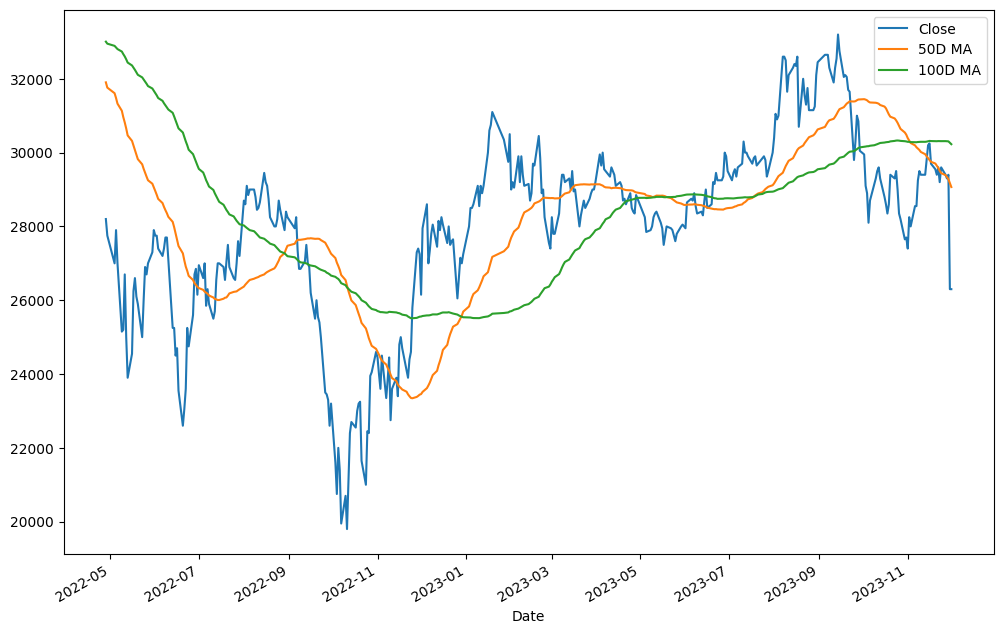

In [20]:
CTG[["Close","50D MA", "100D MA"]].plot(figsize=(12,8))

<Axes: xlabel='Date'>

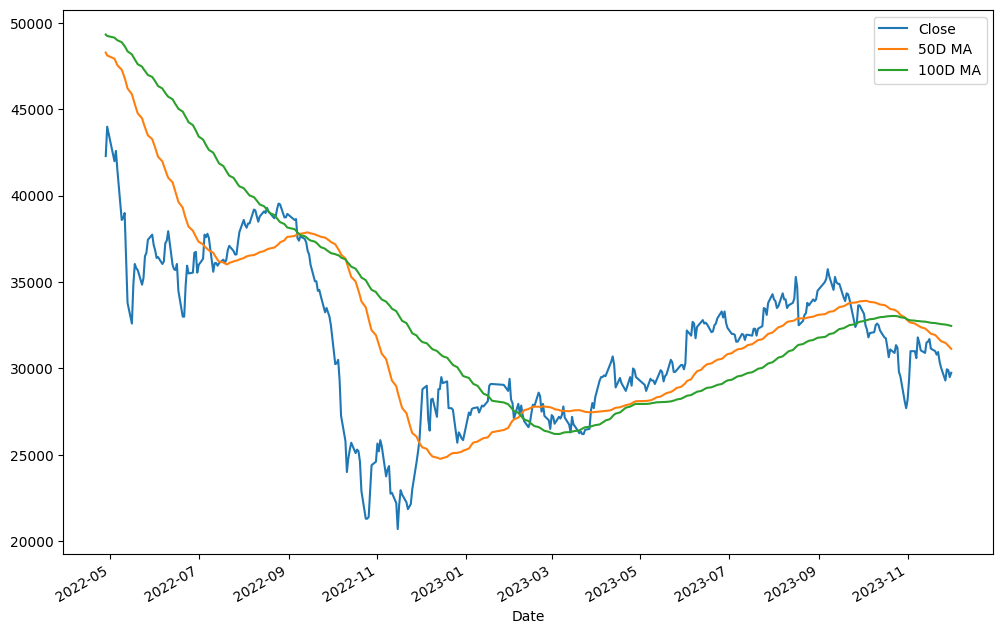

In [21]:
TCB[["Close","50D MA", "100D MA"]].plot(figsize=(12,8))

<Axes: xlabel='Date'>

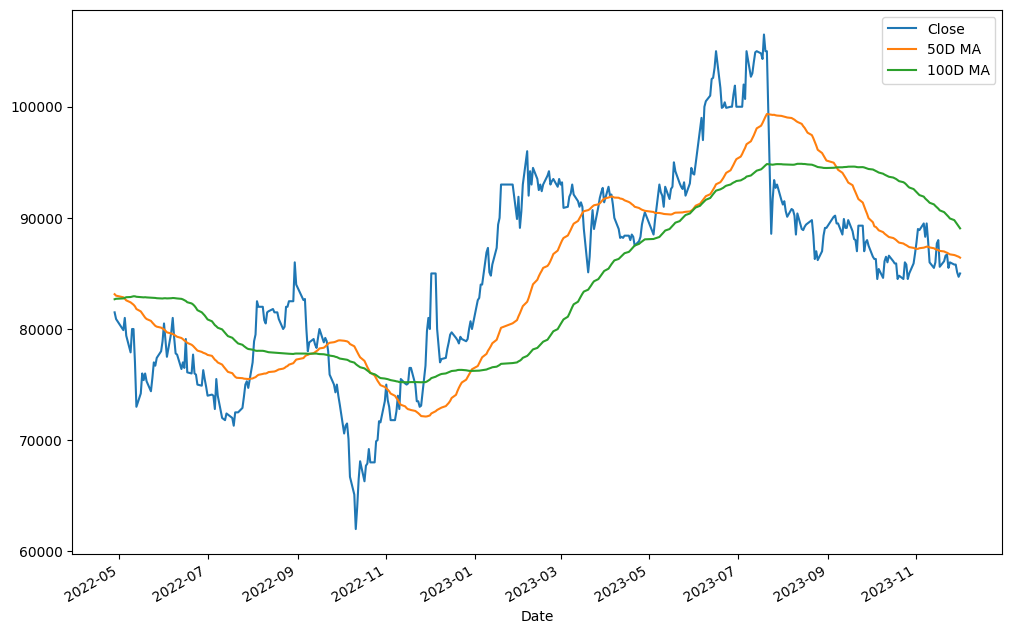

In [22]:
VCB[["Close","50D MA", "100D MA"]].plot(figsize=(12,8))

<Axes: xlabel='Date'>

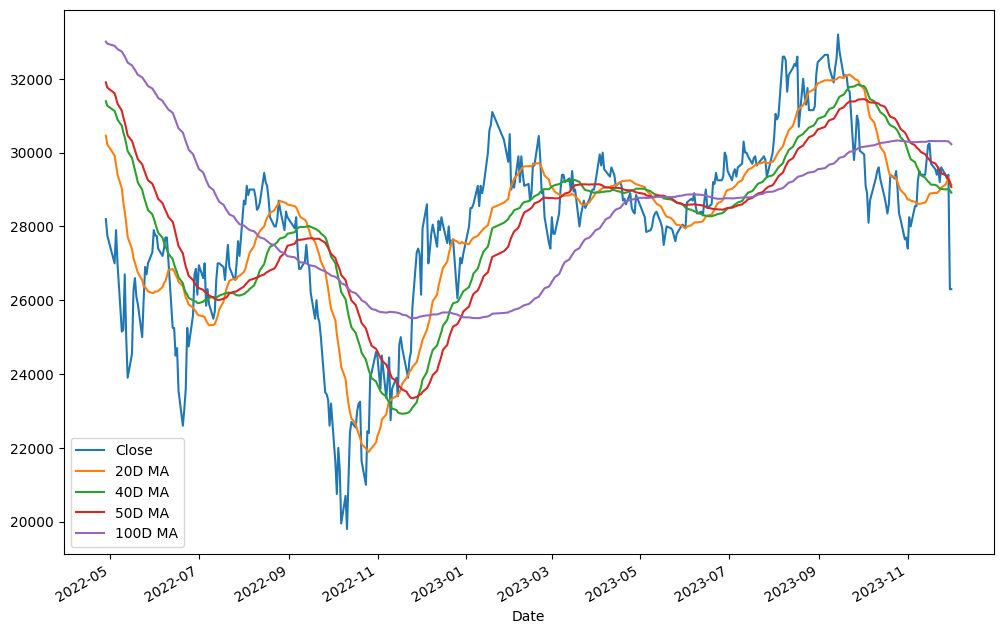

In [23]:
CTG[["Close","20D MA", "40D MA", "50D MA", "100D MA"]].plot(figsize=(12,8))

<Axes: xlabel='Date'>

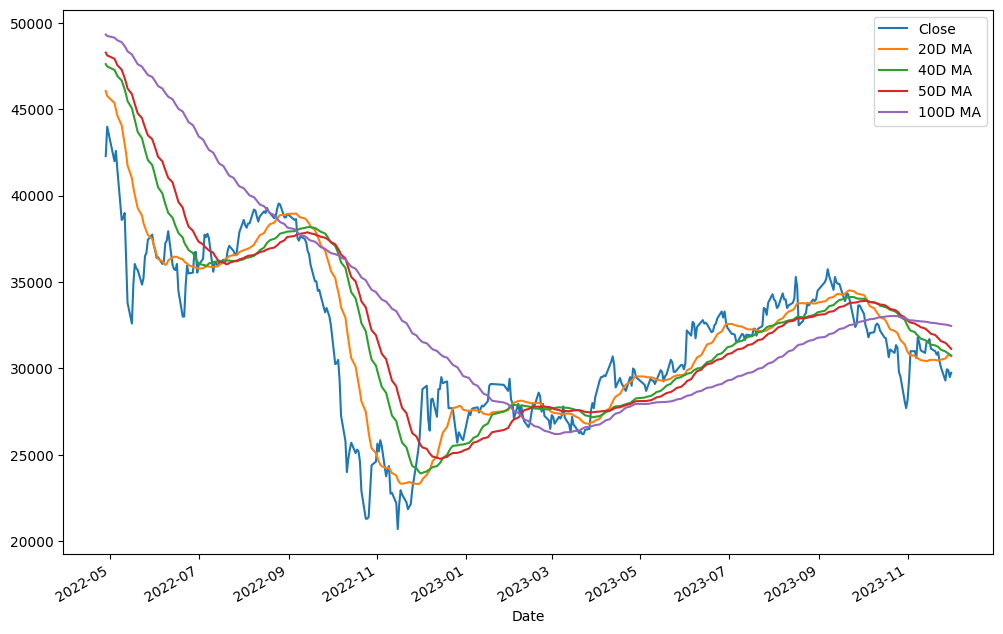

In [24]:
TCB[["Close","20D MA", "40D MA", "50D MA", "100D MA"]].plot(figsize=(12,8))

<Axes: xlabel='Date'>

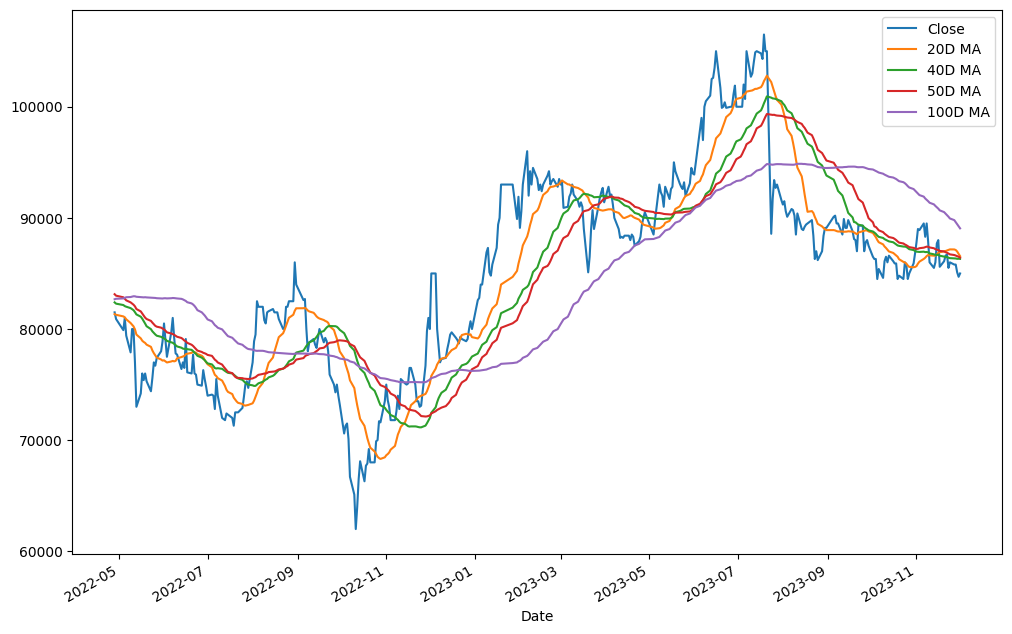

In [25]:
VCB[["Close","20D MA", "40D MA", "50D MA", "100D MA"]].plot(figsize=(12,8))

<Axes: xlabel='Date'>

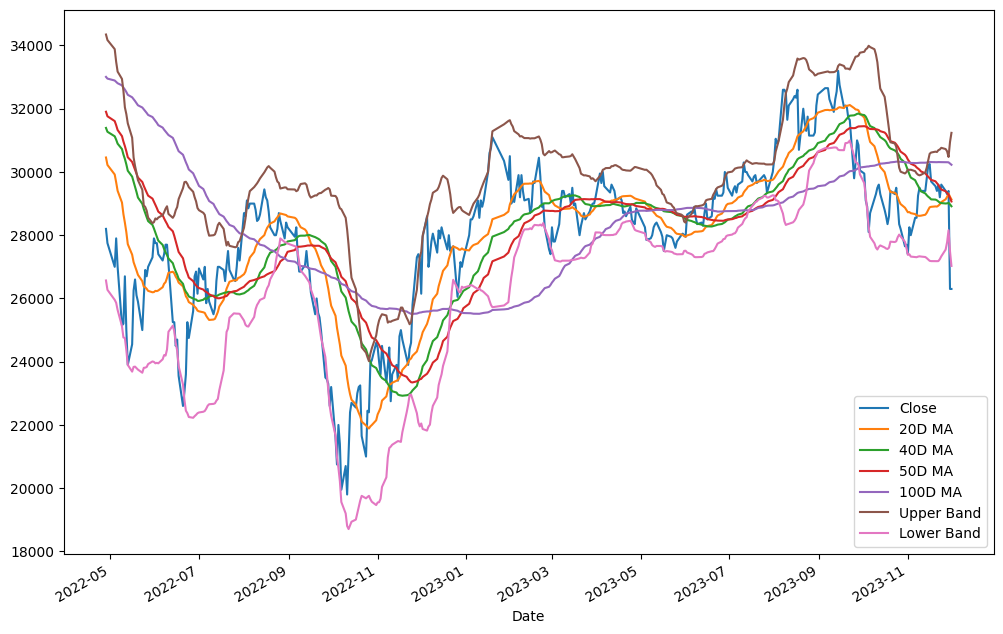

In [26]:
CTG[["Close","20D MA", "40D MA", "50D MA", "100D MA", "Upper Band", "Lower Band"]].plot(figsize=(12,8))

<Axes: xlabel='Date'>

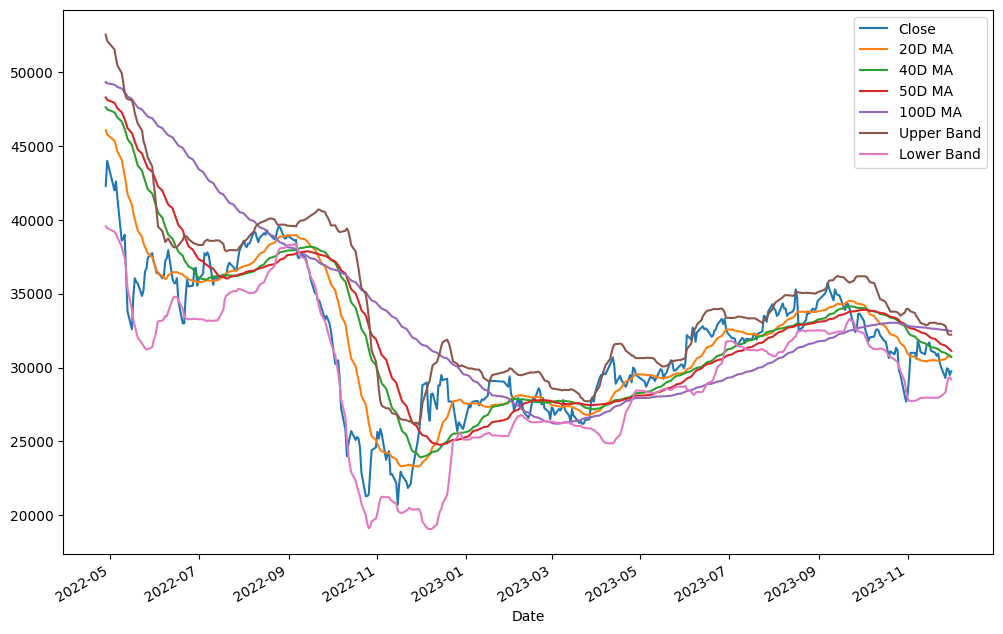

In [27]:
TCB[["Close","20D MA", "40D MA", "50D MA", "100D MA", "Upper Band", "Lower Band"]].plot(figsize=(12,8))

<Axes: xlabel='Date'>

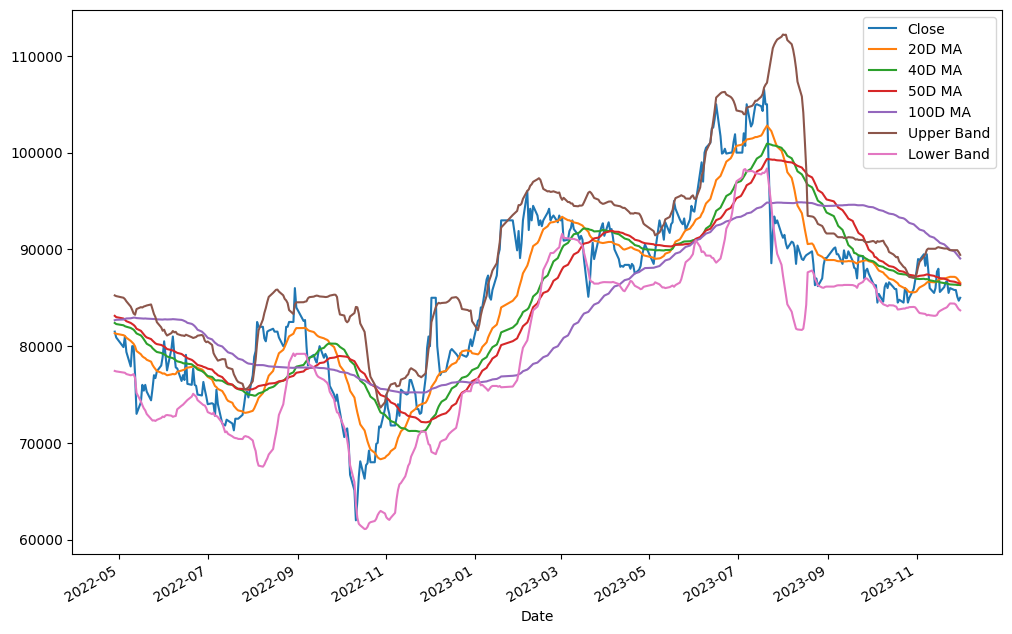

In [28]:
VCB[["Close","20D MA", "40D MA", "50D MA", "100D MA", "Upper Band", "Lower Band"]].plot(figsize=(12,8))

-------------------------------------------PHÂN TÍCH(Portfolio Optimization)----------------------------------------------

In [29]:
port = pd.concat([VCB['Close'], TCB['Close'], CTG['Close']], axis=1)
port.head()

,Close,Close,Close
Date,,,
2022-04-28,81500,42300,28200.0
2022-04-29,80900,44000,27750.0
2022-05-04,79900,42000,27000.0
2022-05-05,81000,42600,27900.0
2022-05-06,79400,41500,27000.0


In [30]:
port.columns= ["VCB Close","TCB Close","CTG Close"]

Plot prices performance of the two: normalize to start at the same price

In [31]:
ret=port/port.iloc[0]*100
ret

,VCB Close,TCB Close,CTG Close
Date,,,
2022-04-28,100.000000,100.000000,100.000000
2022-04-29,99.263804,104.018913,98.404255
2022-05-04,98.036810,99.290780,95.744681
2022-05-05,99.386503,100.709220,98.936170
2022-05-06,97.423313,98.108747,95.744681
...,...,...,...
2023-11-27,105.276074,69.267139,104.255319
2023-11-28,105.276074,70.803783,103.900709
2023-11-29,104.417178,70.685579,104.255319


<Axes: xlabel='Date'>

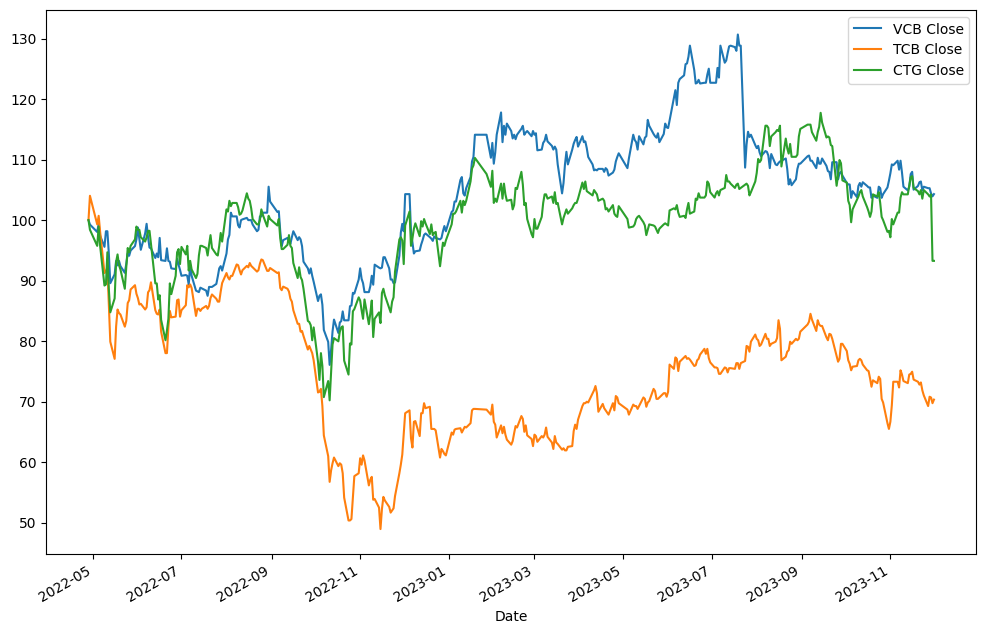

In [32]:
ret.plot(figsize=(12,8))

In [33]:
##caculate log return, covariance, and correlation
# Log return
log_ret= np.log(port/port.shift(1))
log_ret

,VCB Close,TCB Close,CTG Close
Date,,,
2022-04-28,NaN,NaN,NaN
2022-04-29,-0.007389,0.039403,-0.016086
2022-05-04,-0.012438,-0.046520,-0.027399
2022-05-05,0.013673,0.014185,0.032790
2022-05-06,-0.019951,-0.026161,-0.032790
...,...,...,...
2023-11-27,-0.002328,-0.025275,-0.006780
2023-11-28,0.000000,0.021942,-0.003407
2023-11-29,-0.008192,-0.001671,0.003407


In [34]:
#Annualized log return 
log_ret.mean()*252
#=> lấy 252 vì thường 1 năm sẽ có 252 đợt giao dịch

VCB Close    0.026424
TCB Close   -0.221181
CTG Close   -0.043835
dtype: float64

In [35]:
#Annualized cov
log_ret.cov()*252

,VCB Close,TCB Close,CTG Close
VCB Close,0.086230,0.042495,0.047584
TCB Close,0.042495,0.146118,0.090188
CTG Close,0.047584,0.090188,0.140152


In [36]:
#correlation
log_ret.corr()

,VCB Close,TCB Close,CTG Close
VCB Close,1.000000,0.378581,0.432844
TCB Close,0.378581,1.000000,0.630227
CTG Close,0.432844,0.630227,1.000000


Weight

In [37]:
# get weights for each data asset
ticker = [CTG,TCB,VCB]
num_stock = len(ticker)
num_stock

3

In [38]:
#create a random array for weights of three asset
w_array= np.random.random(num_stock)
w_array

array([0.94644605, 0.90211416, 0.37453709])

In [39]:
#make sure the sum of the three equal to 1
w_array[0]+w_array[1]+w_array[2]==1

False

In [40]:
weight= np.random.random(num_stock)
weight=weight/np.sum(weight)
weight[0]+weight[1]+weight[2]

0.9999999999999998

Expected port return

In [41]:
np.sum(weight*log_ret.mean())*252

-0.09287722455522343

Expected port variance 

In [42]:
port_var=np.dot(weight.T,np.dot(log_ret.cov()*252,weight))
port_var

0.08143613207716091

Expected port volatility

In [43]:
np.sqrt(np.dot(weight.T,np.dot(log_ret.cov()*252,weight)))

0.28537016676092986

In [44]:
np.sqrt(port_var)

0.28537016676092986

Run 1000 simulation with difference weights

In [45]:
port_ret=[]
port_vol=[]

for i in range(1000):
    weight=np.random.random(num_stock)
    weight /= np.sum(weight)
    port_ret.append(np.sum(weight*log_ret.mean())*252)
    port_vol.append(np.sqrt(np.dot(weight.T,np.dot(log_ret.cov()*252, weight))))
#create an array: convert the list above to array to store value for port_ret and port_vol
# This is important in order to plot efficient frontier
port_ret= np.array(port_ret)
port_vol= np.array(port_vol)

port_ret
port_vol

array([0.28326589, 0.27027265, 0.29332303, 0.27766151, 0.31018359,
       0.31047087, 0.26953789, 0.30359785, 0.27095515, 0.32038099,
       0.34801645, 0.29937052, 0.31016098, 0.3042553 , 0.34478442,
       0.28365874, 0.3115531 , 0.32714526, 0.29272581, 0.30798943,
       0.3246317 , 0.33668007, 0.3420957 , 0.3257038 , 0.26703462,
       0.27015049, 0.2719017 , 0.31258799, 0.31926873, 0.28620246,
       0.26813535, 0.29824985, 0.27034822, 0.32024032, 0.33344145,
       0.26929027, 0.28187054, 0.3461585 , 0.28885599, 0.27519448,
       0.28183063, 0.29588898, 0.31230211, 0.29578246, 0.2765726 ,
       0.29238063, 0.32474958, 0.27915897, 0.27959981, 0.27333422,
       0.30224468, 0.29000547, 0.27703461, 0.3333954 , 0.31102551,
       0.28816651, 0.29230452, 0.29447548, 0.29472517, 0.27266455,
       0.27901691, 0.28700534, 0.2695802 , 0.29081643, 0.27828076,
       0.2945079 , 0.29325417, 0.28362038, 0.27529628, 0.3092712 ,
       0.30540225, 0.29581145, 0.27163852, 0.27047472, 0.31773

Plot efficient frontier

In [46]:
#create a portfolio with 2 conlumns: return and volatility
portfolio = pd.DataFrame({'return':port_ret, 'volatility':port_vol})
portfolio

,return,volatility
0,-0.073446,0.283266
1,-0.049681,0.270273
2,-0.104805,0.293323
3,-0.084982,0.277662
4,-0.143711,0.310184
...,...,...
995,-0.105601,0.285355
996,-0.060393,0.282109
997,-0.162731,0.331123
998,-0.031795,0.303703


Text(0, 0.5, 'Return')

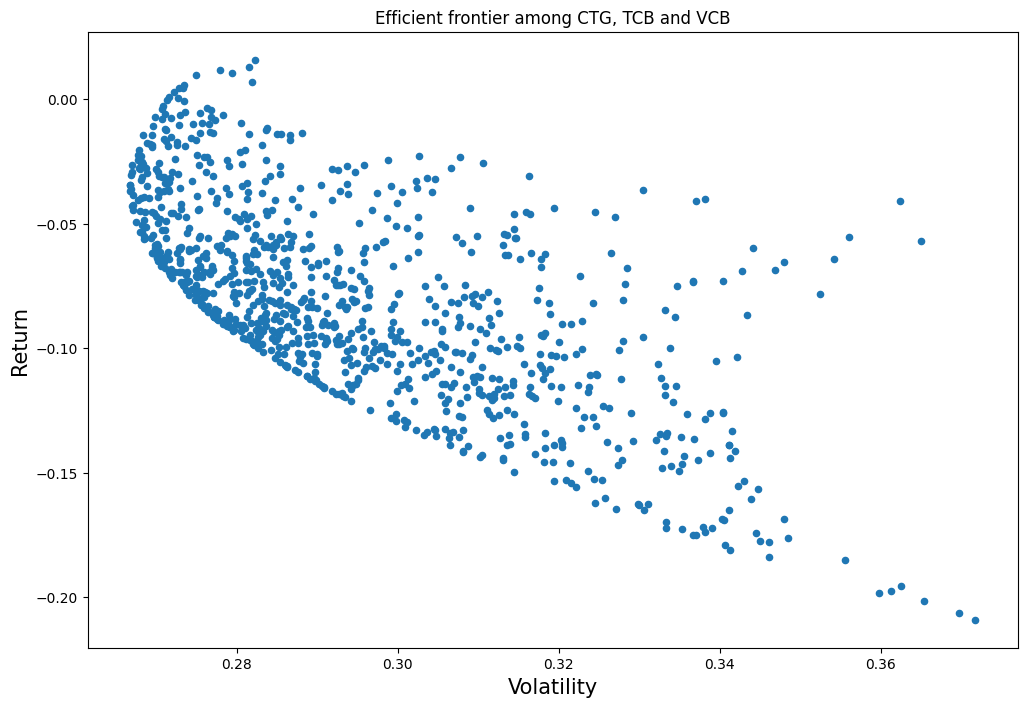

In [47]:
portfolio.plot(x='volatility', y='return',kind='scatter',figsize=(12,8))
plt.title("Efficient frontier among CTG, TCB and VCB")
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)

In [48]:
port

,VCB Close,TCB Close,CTG Close
Date,,,
2022-04-28,81500,42300,28200.0
2022-04-29,80900,44000,27750.0
2022-05-04,79900,42000,27000.0
2022-05-05,81000,42600,27900.0
2022-05-06,79400,41500,27000.0
...,...,...,...
2023-11-27,85800,29300,29400.0
2023-11-28,85800,29950,29300.0
2023-11-29,85100,29900,29400.0


-----------------------------------------MÔ HÌNH CAPM------------------------------------------------

In [ ]:
VNI=pd.read_excel("D:/stata/Python basic/BAICUOIKI/VNI.xlsx")

In [ ]:
def read_data(data):
    df = pd.read_excel(data, index_col='Date', parse_dates=True)
    df['Vol.'].replace({"K": "*1e3", "M": "*1e6"}, inplace=True, regex=True)
    df['Vol.'] = df['Vol.'].map(pd.eval).astype(int)
    df.columns = ['Close', 'Open', 'High', 'Low', 'Volume', 'Change']
    df.sort_values(by='Date', ascending=True, inplace=True)
    return df
data="D:\stata\Python basic\BAICUOIKI\VNI.xlsx"

In [ ]:
VNI = read_data(data)

In [ ]:
port = pd.concat([VCB['Close'], TCB['Close'], CTG['Close'], VNI['Close']], axis=1)
port.columns=['VBC','TCB','CTG','VNI']
port.dropna(inplace=True)
port.head()

,VBC,TCB,CTG,VNI
Date,,,,
2022-04-28,81500.0,42300.0,28200.0,1350.99
2022-04-29,80900.0,44000.0,27750.0,1366.80
2022-05-04,79900.0,42000.0,27000.0,1348.68
2022-05-05,81000.0,42600.0,27900.0,1360.68
2022-05-06,79400.0,41500.0,27000.0,1329.26


In [ ]:
port_ret=np.log(port/port.shift(1))
port_ret

,VBC,TCB,CTG,VNI
Date,,,,
2022-04-28,NaN,NaN,NaN,NaN
2022-04-29,-0.007389,0.039403,-0.016086,0.011635
2022-05-04,-0.012438,-0.046520,-0.027399,-0.013346
2022-05-05,0.013673,0.014185,0.032790,0.008858
2022-05-06,-0.019951,-0.026161,-0.032790,-0.023362
...,...,...,...,...
2023-11-27,-0.002328,-0.025275,-0.006780,-0.006915
2023-11-28,0.000000,0.021942,-0.003407,0.006751
2023-11-29,-0.008192,-0.001671,0.003407,0.006705


In [ ]:
#beta=cov_mã cổ phiếu_VNindex/Vnindex_var

In [ ]:
port_cov=port_ret.cov()*252
port_cov

,VBC,TCB,CTG,VNI
VBC,0.086230,0.042495,0.047584,0.033776
TCB,0.042495,0.146118,0.090188,0.066642
CTG,0.047584,0.090188,0.140152,0.063552
VNI,0.033776,0.066642,0.063552,0.049010


In [ ]:
#checking covariance between CTG anđ VNI
cov_CTG_VNI=port_cov.iloc[0,3]
cov_CTG_VNI

0.0337763642007585

In [ ]:
VNI_var=port_ret['VNI'].var()*252
VNI_var

0.04901031418415056

CACULATE BETA

In [ ]:
#nên lấy dlieu 5 năm
CTG_beta=cov_CTG_VNI/VNI_var
CTG_beta

0.6891684895927771

----------------------------CACULATE RETURN------------------------------

In [ ]:
CTG_close=CTG['Close']
CTG_close

Date
2022-04-28    28200.0
2022-04-29    27750.0
2022-05-04    27000.0
2022-05-05    27900.0
2022-05-06    27000.0
               ...   
2023-11-27    29400.0
2023-11-28    29300.0
2023-11-29    29400.0
2023-11-30    26300.0
2023-12-01    26300.0
Name: Close, Length: 402, dtype: float64

In [ ]:
#Daily return
CTG_ret=CTG_close/CTG_close.shift(1)-1
CTG_ret

Date
2022-04-28         NaN
2022-04-29   -0.015957
2022-05-04   -0.027027
2022-05-05    0.033333
2022-05-06   -0.032258
                ...   
2023-11-27   -0.006757
2023-11-28   -0.003401
2023-11-29    0.003413
2023-11-30   -0.105442
2023-12-01    0.000000
Name: Close, Length: 402, dtype: float64

In [ ]:
#log_return
CTG_logret=np.log(CTG_close/CTG_close.shift(1))
CTG_logret

Date
2022-04-28         NaN
2022-04-29   -0.016086
2022-05-04   -0.027399
2022-05-05    0.032790
2022-05-06   -0.032790
                ...   
2023-11-27   -0.006780
2023-11-28   -0.003407
2023-11-29    0.003407
2023-11-30   -0.111426
2023-12-01    0.000000
Name: Close, Length: 402, dtype: float64

<Axes: title={'center': 'CTG Simple Return'}, xlabel='Date'>

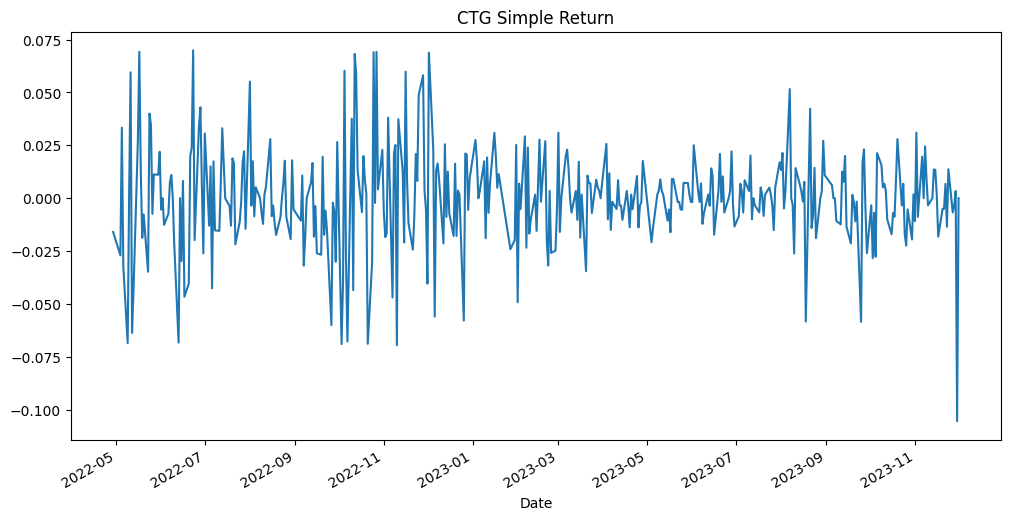

In [ ]:
#plot the return
CTG_ret.dropna().plot(figsize=(12,6),title="CTG Simple Return")

Text(0.5, 1.0, 'CTG Simple Log Return')

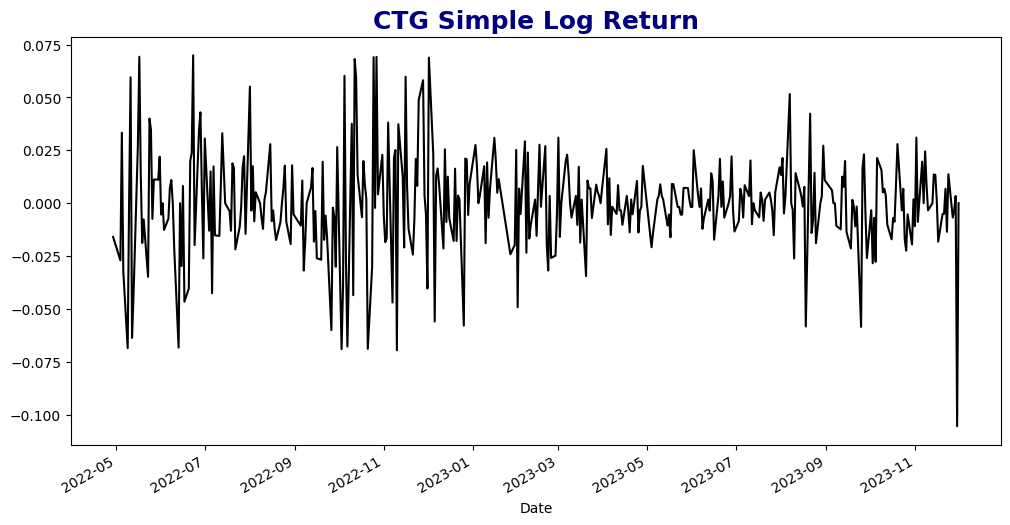

In [ ]:
CTG_ret.dropna().plot(figsize=(12,6),c="black")
plt.title("CTG Simple Log Return",color="navy",fontsize=18,fontweight="bold")

CACULATE COMPOUNDED RETURN

In [ ]:
CTG_ret

Date
2022-04-28         NaN
2022-04-29   -0.015957
2022-05-04   -0.027027
2022-05-05    0.033333
2022-05-06   -0.032258
                ...   
2023-11-27   -0.006757
2023-11-28   -0.003401
2023-11-29    0.003413
2023-11-30   -0.105442
2023-12-01    0.000000
Name: Close, Length: 402, dtype: float64

In [ ]:
#compounding return using np.prod() or .prod()
(1+CTG_ret).prod()-1

-0.06737588652482362

In [ ]:
np.prod(1+CTG_ret)-1

-0.06737588652482362

In [ ]:
CTG_close

Date
2022-04-28    28200.0
2022-04-29    27750.0
2022-05-04    27000.0
2022-05-05    27900.0
2022-05-06    27000.0
               ...   
2023-11-27    29400.0
2023-11-28    29300.0
2023-11-29    29400.0
2023-11-30    26300.0
2023-12-01    26300.0
Name: Close, Length: 402, dtype: float64

In [ ]:
#check
CTG_close.iloc[-1]/CTG_close.iloc[0]-1

-0.06737588652482274

In [ ]:
#compound monthly return
#resample to monthly date
CTG_m_close=CTG_close.resample("M").last()
CTG_m_close

Date
2022-04-30    27750.0
2022-05-31    27900.0
2022-06-30    26150.0
2022-07-31    27200.0
2022-08-31    28250.0
2022-09-30    23200.0
2022-10-31    24600.0
2022-11-30    27250.0
2022-12-31    27250.0
2023-01-31    30500.0
2023-02-28    27400.0
2023-03-31    29200.0
2023-04-30    28850.0
2023-05-31    28000.0
2023-06-30    29500.0
2023-07-31    30000.0
2023-08-31    32450.0
2023-09-30    30050.0
2023-10-31    27700.0
2023-11-30    26300.0
2023-12-31    26300.0
Freq: M, Name: Close, dtype: float64

In [ ]:
#monthly return
CTG_m_ret=CTG_m_close.pct_change()
CTG_m_ret

Date
2022-04-30         NaN
2022-05-31    0.005405
2022-06-30   -0.062724
2022-07-31    0.040153
2022-08-31    0.038603
2022-09-30   -0.178761
2022-10-31    0.060345
2022-11-30    0.107724
2022-12-31    0.000000
2023-01-31    0.119266
2023-02-28   -0.101639
2023-03-31    0.065693
2023-04-30   -0.011986
2023-05-31   -0.029463
2023-06-30    0.053571
2023-07-31    0.016949
2023-08-31    0.081667
2023-09-30   -0.073960
2023-10-31   -0.078203
2023-11-30   -0.050542
2023-12-31    0.000000
Freq: M, Name: Close, dtype: float64

In [ ]:
#compound monthly return
CTG_comp_m_ret=(1+CTG_m_ret).prod()-1
CTG_comp_m_ret

-0.05225225225225205

Caculate annualized return

In [ ]:
#annualized daily return
daily_ret=0.001
(1+daily_ret)**250-1

0.2838650304502215

In [ ]:
#annualized weekly return
weekly_ret=0.005
(1+weekly_ret)**52-1

0.29609015373008996

In [ ]:
#annualized monthly return
monthly_ret=0.05
(1+monthly_ret)**12-1

0.7958563260221301

In [ ]:
#annualized quarterly return
quarterly_ret=0.1
(1+quarterly_ret)**4-1

0.4641000000000004

CACULATE RETURN FOR THAN 1 STOCKS

In [ ]:

ticker=['D:\stata\Python basic\BAICUOIKI\CTG.xlsx','D:\stata\Python basic\BAICUOIKI\TCB.xlsx','D:\stata\Python basic\BAICUOIKI\VCB.xlsx']
stocks=pd.DataFrame()

for t in ticker:
    stocks[t]=pd.read_excel(t,index_col='Date',parse_dates=True,thousands=",")['Price']

In [ ]:
stocks

,D:\stata\Python basic\BAICUOIKI\CTG.xlsx,D:\stata\Python basic\BAICUOIKI\TCB.xlsx,D:\stata\Python basic\BAICUOIKI\VCB.xlsx
Date,,,
2023-12-01,26300.0,29750,85000
2023-11-30,26300.0,29500,84700
2023-11-29,29400.0,29900,85100
2023-11-28,29300.0,29950,85800
2023-11-27,29400.0,29300,85800
...,...,...,...
2021-12-07,31919.1,50000,76025
2021-12-06,31333.4,49000,73858
2021-12-03,32211.9,50200,75871


In [ ]:
stocks.columns=['CTG','TCB','VCB']

In [ ]:
stocks

,CTG,TCB,VCB
Date,,,
2023-12-01,26300.0,29750,85000
2023-11-30,26300.0,29500,84700
2023-11-29,29400.0,29900,85100
2023-11-28,29300.0,29950,85800
2023-11-27,29400.0,29300,85800
...,...,...,...
2021-12-07,31919.1,50000,76025
2021-12-06,31333.4,49000,73858
2021-12-03,32211.9,50200,75871


In [ ]:
stocks_m=stocks.resample("M").last()
stocks_m_ret=stocks_m.pct_change()
stocks_m_ret

,CTG,TCB,VCB
Date,,,
2021-12-31,NaN,NaN,NaN
2022-01-31,0.088496,0.056000,0.129442
2022-02-28,-0.101626,-0.045455,-0.050562
2022-03-31,-0.021116,-0.016865,-0.028402
2022-04-30,-0.144838,-0.112008,-0.014616
2022-05-31,0.005405,-0.155682,-0.024722
2022-06-30,-0.062724,-0.043069,-0.051965
2022-07-31,0.040153,0.066104,-0.001337
2022-08-31,0.038603,0.027704,0.124498


In [ ]:
(1+stocks_m_ret).prod()

CTG    0.775811
TCB    0.595000
VCB    1.078680
dtype: float64

In [ ]:
stocks_m_ret.mean()

CTG   -0.007374
TCB   -0.016603
VCB    0.005251
dtype: float64

In [ ]:
(1+stocks_m_ret.mean())**12-1

CTG   -0.084991
TCB   -0.182010
VCB    0.064859
dtype: float64

<Axes: xlabel='Date'>

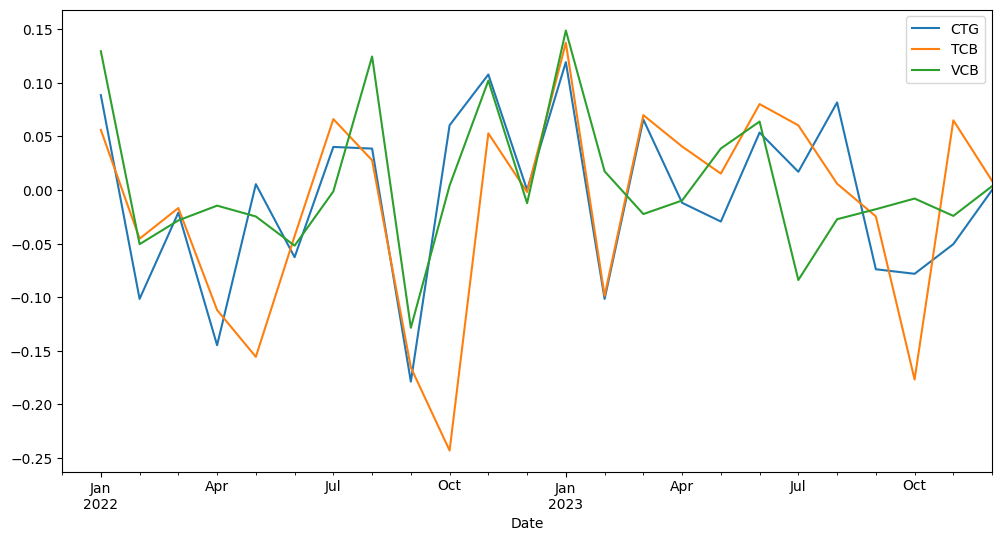

In [ ]:
stocks_m_ret.plot(figsize=(12,6))

CACULATE INVESTMENT RISK

In [ ]:
port=port.drop(labels='VNI',axis=1)

In [ ]:
stocks_logret=np.log(port/port.shift(1))
stocks_logret

,VBC,TCB,CTG
Date,,,
2022-04-28,NaN,NaN,NaN
2022-04-29,-0.007389,0.039403,-0.016086
2022-05-04,-0.012438,-0.046520,-0.027399
2022-05-05,0.013673,0.014185,0.032790
2022-05-06,-0.019951,-0.026161,-0.032790
...,...,...,...
2023-11-27,-0.002328,-0.025275,-0.006780
2023-11-28,0.000000,0.021942,-0.003407
2023-11-29,-0.008192,-0.001671,0.003407


In [ ]:
#tính volatility(độ biến động) của từng cổ phiếu
#CTG
np.sqrt(stocks_logret['CTG'].var()*252) #lấy số 252 vì trong 1 năm có 252 ngày giao dịch


0.3743687991694484

In [ ]:
#TCB
np.sqrt(stocks_logret['TCB'].var()*252)

0.38225383535144614

In [ ]:
port.columns=['VCB','TCB','CTG']
port

,VCB,TCB,CTG
Date,,,
2022-04-28,81500.0,42300.0,28200.0
2022-04-29,80900.0,44000.0,27750.0
2022-05-04,79900.0,42000.0,27000.0
2022-05-05,81000.0,42600.0,27900.0
2022-05-06,79400.0,41500.0,27000.0
...,...,...,...
2023-11-27,85800.0,29300.0,29400.0
2023-11-28,85800.0,29950.0,29300.0
2023-11-29,85100.0,29900.0,29400.0


In [ ]:
stocks_logret['CTG'].mean()*252

-0.043834827350643715

In [ ]:
stocks_logret['TCB'].mean()*252

-0.22118055965902697

In [ ]:
stocks_logret['VCB'].mean()*252

0.02642432801337191

In [ ]:
#caculate covariance and correlation giữa các cổ phiếu
#variance
CTG_var=stocks_logret['CTG'].var()*252
TCB_var=stocks_logret['TCB'].var()*252
VCB_var=stocks_logret['VCB'].var()*252
# c2: tính variance và covariance giữa các cổ phiếu với chỉ một đoạn code sau
stocks_logret.cov()*252

,VCB,TCB,CTG
VCB,0.086230,0.042495,0.047584
TCB,0.042495,0.146118,0.090188
CTG,0.047584,0.090188,0.140152


In [ ]:
#Khi đo lường mối liên hệ giữa các cổ phiếu, chúng ta sẽ dùng chủ yếu là correlation (thay vì covariance)
stocks_logret.corr() #lưu ý: không annualized khi tính "correlation"

,VCB,TCB,CTG
VCB,1.000000,0.378581,0.432844
TCB,0.378581,1.000000,0.630227
CTG,0.432844,0.630227,1.000000


CACULATE PORTFOLIO INVESTMENT RISK

In [ ]:
#tỷ trọng cho từng cổ phiếu
stock_weight=np.array([0.5,0.3,0.2])

In [ ]:
#tính variance của port
port_var=np.dot(stock_weight.T,np.dot(stocks_logret.cov()*252,stock_weight)) #np.dot sẽ cho kết quả là 1 con số
port_var

0.07340221456897918

In [ ]:
#tính volatility (std) của port
port_std=port_var**0.5
port_std

0.27092843071368344

In [ ]:
#format lại kết quả
print(str(round(port_std,3)*100)+'%')

27.1%


COMPUTING MAXIMUM DRAWDOWM

In [ ]:
port.sort_values(by="Date",ascending=True,inplace=True)

In [ ]:
port

,VCB,TCB,CTG
Date,,,
2022-04-28,81500.0,42300.0,28200.0
2022-04-29,80900.0,44000.0,27750.0
2022-05-04,79900.0,42000.0,27000.0
2022-05-05,81000.0,42600.0,27900.0
2022-05-06,79400.0,41500.0,27000.0
...,...,...,...
2023-11-27,85800.0,29300.0,29400.0
2023-11-28,85800.0,29950.0,29300.0
2023-11-29,85100.0,29900.0,29400.0


In [ ]:
#get monthly data
port_monthly=port.resample('M').last()
port_monthly

,VCB,TCB,CTG
Date,,,
2022-04-30,80900.0,44000.0,27750.0
2022-05-31,78900.0,37150.0,27900.0
2022-06-30,74800.0,35550.0,26150.0
2022-07-31,74700.0,37900.0,27200.0
2022-08-31,84000.0,38950.0,28250.0
2022-09-30,73200.0,32500.0,23200.0
2022-10-31,73500.0,24600.0,24600.0
2022-11-30,81000.0,25900.0,27250.0
2022-12-31,80000.0,25850.0,27250.0


In [ ]:
#show only month and year
port_monthly.index=port_monthly.index.to_period('M')
port_monthly

,VCB,TCB,CTG
Date,,,
2022-04,80900.0,44000.0,27750.0
2022-05,78900.0,37150.0,27900.0
2022-06,74800.0,35550.0,26150.0
2022-07,74700.0,37900.0,27200.0
2022-08,84000.0,38950.0,28250.0
2022-09,73200.0,32500.0,23200.0
2022-10,73500.0,24600.0,24600.0
2022-11,81000.0,25900.0,27250.0
2022-12,80000.0,25850.0,27250.0


In [ ]:
port_monthly.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 21 entries, 2022-04 to 2023-12
Freq: M
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VCB     21 non-null     float64
 1   TCB     21 non-null     float64
 2   CTG     21 non-null     float64
dtypes: float64(3)
memory usage: 672.0 bytes


In [ ]:
port_monthly.describe()

,VCB,TCB,CTG
count,21.000000,21.000000,21.000000
mean,85095.238095,31802.380952,27895.238095
std,7564.620029,5002.161438,2056.569034
min,73200.000000,24600.000000,23200.000000
25%,80000.000000,28350.000000,27200.000000
50%,85000.000000,29950.000000,27750.000000
75%,91400.000000,34500.000000,29200.000000
max,100000.000000,44000.000000,32450.000000


In [ ]:
#monthly ret
port_monthly_ret=port_monthly.pct_change()
port_monthly_ret

,VCB,TCB,CTG
Date,,,
2022-04,NaN,NaN,NaN
2022-05,-0.024722,-0.155682,0.005405
2022-06,-0.051965,-0.043069,-0.062724
2022-07,-0.001337,0.066104,0.040153
2022-08,0.124498,0.027704,0.038603
2022-09,-0.128571,-0.165597,-0.178761
2022-10,0.004098,-0.243077,0.060345
2022-11,0.102041,0.052846,0.107724
2022-12,-0.012346,-0.001931,0.000000


Caculate drawdown

In [ ]:
#first: caculate wealth index
wealth_index=1000*(1+port_monthly_ret).cumprod() #assume start form $1000
#second: caculate previous peaks
previous_peaks=wealth_index.cummax()
#finally: caculate drawdown
drawdown=(wealth_index-previous_peaks)/previous_peaks

In [ ]:
wealth_index

,VCB,TCB,CTG
Date,,,
2022-04,NaN,NaN,NaN
2022-05,975.278121,844.318182,1005.405405
2022-06,924.598269,807.954545,942.342342
2022-07,923.362176,861.363636,980.180180
2022-08,1038.318912,885.227273,1018.018018
2022-09,904.820766,738.636364,836.036036
2022-10,908.529048,559.090909,886.486486
2022-11,1001.236094,588.636364,981.981982
2022-12,988.875155,587.500000,981.981982


In [ ]:
previous_peaks

,VCB,TCB,CTG
Date,,,
2022-04,NaN,NaN,NaN
2022-05,975.278121,844.318182,1005.405405
2022-06,975.278121,844.318182,1005.405405
2022-07,975.278121,861.363636,1005.405405
2022-08,1038.318912,885.227273,1018.018018
2022-09,1038.318912,885.227273,1018.018018
2022-10,1038.318912,885.227273,1018.018018
2022-11,1038.318912,885.227273,1018.018018
2022-12,1038.318912,885.227273,1018.018018


<Axes: xlabel='Date'>

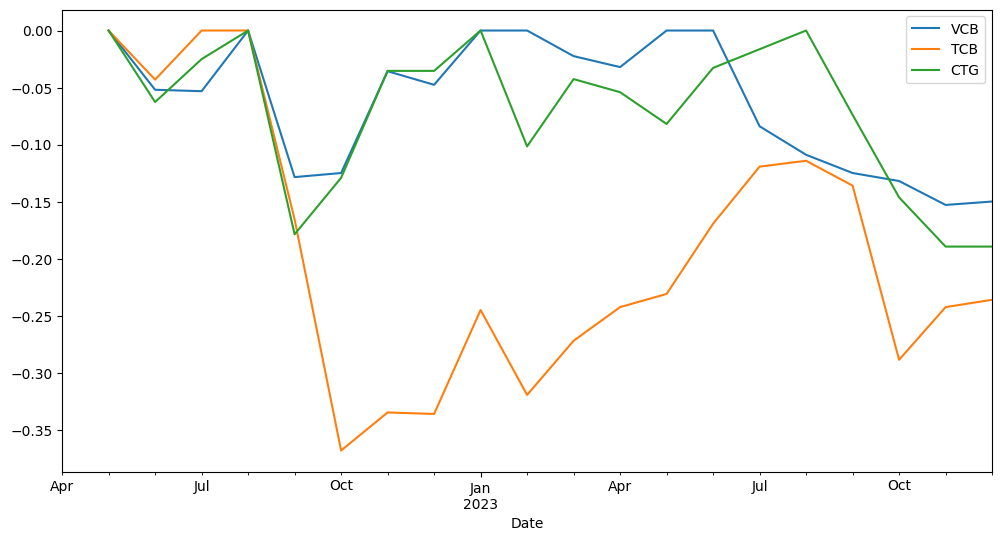

In [ ]:
drawdown.plot(figsize=(12,6))

In [ ]:
#create drawdown function
def drawdown(returns):
    wealth_index=1000*(1+returns).cumprod()
    previous_peaks=wealth_index.cummax()
    drawdown=(wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({'Wealth': wealth_index, 'Previous Peak': previous_peaks, 'Drawdown': drawdown})




In [ ]:
drawdown(port_monthly_ret['CTG'])

,Wealth,Previous Peak,Drawdown
Date,,,
2022-04,NaN,NaN,NaN
2022-05,1005.405405,1005.405405,0.000000
2022-06,942.342342,1005.405405,-0.062724
2022-07,980.180180,1005.405405,-0.025090
2022-08,1018.018018,1018.018018,0.000000
2022-09,836.036036,1018.018018,-0.178761
2022-10,886.486486,1018.018018,-0.129204
2022-11,981.981982,1018.018018,-0.035398
2022-12,981.981982,1018.018018,-0.035398


In [ ]:
drawdown(port_monthly_ret['CTG'])['Drawdown']

Date
2022-04         NaN
2022-05    0.000000
2022-06   -0.062724
2022-07   -0.025090
2022-08    0.000000
2022-09   -0.178761
2022-10   -0.129204
2022-11   -0.035398
2022-12   -0.035398
2023-01    0.000000
2023-02   -0.101639
2023-03   -0.042623
2023-04   -0.054098
2023-05   -0.081967
2023-06   -0.032787
2023-07   -0.016393
2023-08    0.000000
2023-09   -0.073960
2023-10   -0.146379
2023-11   -0.189522
2023-12   -0.189522
Freq: M, Name: Drawdown, dtype: float64

<Axes: xlabel='Date'>

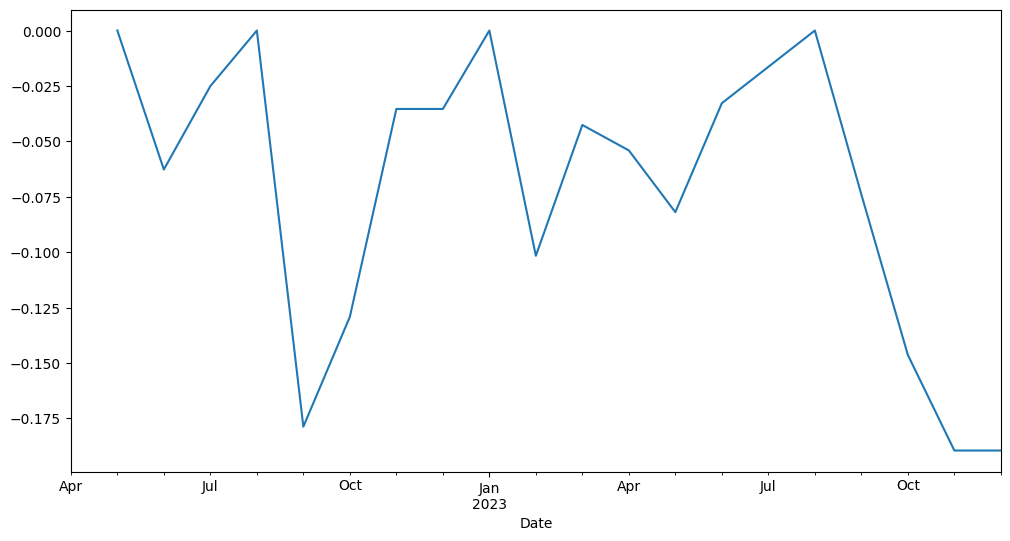

In [ ]:
drawdown(port_monthly_ret['CTG'])['Drawdown'].plot(figsize=(12,6))

<Axes: xlabel='Date'>

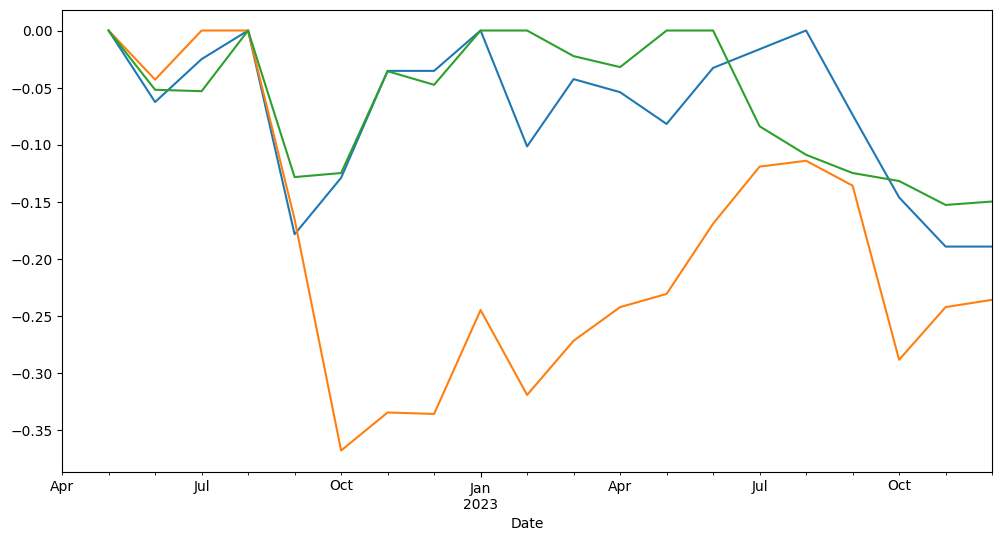

In [ ]:
drawdown(port_monthly_ret['CTG'])['Drawdown'].plot(figsize=(12,6))
drawdown(port_monthly_ret['TCB'])['Drawdown'].plot()
drawdown(port_monthly_ret['VCB'])['Drawdown'].plot()

----------------------------SIMPLE LINEAR REGRESSION------------------------------------

In [ ]:
VNI

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-12-01,1485.19,1478.44,1487.68,1471.30,876730,0.0046
2021-12-02,1482.05,1485.19,1493.84,1482.05,763960,-0.0021
2021-12-03,1443.32,1482.05,1491.20,1443.32,1100000,-0.0261
2021-12-06,1413.58,1443.32,1452.55,1400.87,1040000,-0.0206
2021-12-07,1446.77,1413.58,1446.77,1413.58,755910,0.0235
...,...,...,...,...,...,...
2023-11-27,1088.06,1095.61,1096.84,1085.69,595020,-0.0069
2023-11-28,1095.43,1088.06,1095.43,1076.45,681890,0.0068
2023-11-29,1102.80,1095.43,1105.28,1095.43,614960,0.0067


In [ ]:
data= pd.concat([CTG["Close"],TCB["Close"],VCB["Close"],VNI["Close"]],axis=1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,Close,Close,Close,Close
Date,,,,
2022-04-28,28200.0,42300.0,81500.0,1350.99
2022-04-29,27750.0,44000.0,80900.0,1366.80
2022-05-04,27000.0,42000.0,79900.0,1348.68
2022-05-05,27900.0,42600.0,81000.0,1360.68
2022-05-06,27000.0,41500.0,79400.0,1329.26
...,...,...,...,...
2023-11-27,29400.0,29300.0,85800.0,1088.06
2023-11-28,29300.0,29950.0,85800.0,1095.43
2023-11-29,29400.0,29900.0,85100.0,1102.80


In [ ]:
data.columns=['CTG','TCB','VCB','VNI']

-------------------------------#CTG--------------------------------

In [ ]:
#Declare X and Y
Y=data['CTG']
X=data['VNI']

In [ ]:
#Create a constant X1
X1=sm.add_constant(X)

In [ ]:
#run regression
result1=sm.OLS(Y,X1).fit()
result1

In [ ]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTG   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.79
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.37e-07
Time:                        13:34:31   Log-Likelihood:                -3696.6
No. Observations:                 402   AIC:                             7397.
Df Residuals:                     400   BIC:                             7405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.011e+04   1471.350     13.666      0.000    1.72e+04     2.3e+04
VNI            6.9666      1.298      5.366      0.000       4.414       9.519
==============================================================================
Omnibus:                       32.156   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.232
Skew:                          -0.754   Prob(JB):                     4.99e-09
Kurtosis:                       3.074   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

----------------------------------TCB-------------------------------------

In [ ]:
#Declare X and Y
Y=data['TCB']
X=data['VNI']
#Create a constant X1
X1=sm.add_constant(X)
#run regression
result1=sm.OLS(Y,X1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCB   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     3476.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.30e-199
Time:                        13:37:59   Log-Likelihood:                -3494.0
No. Observations:                 402   AIC:                             6992.
Df Residuals:                     400   BIC:                             7000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.07e+04    888.866    -23.288      0.000   -2.24e+04    -1.9e+04
VNI           46.2418      0.784     58.957      0.000      44.700      47.784
==============================================================================
Omnibus:                        0.881   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.661
Skew:                          -0.049   Prob(JB):                        0.719
Kurtosis:                       3.172   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-----------------------------------VCB-----------------------------------

In [ ]:
#Declare X and Y
Y=data['VCB']
X=data['VNI']
#Create a constant X1
X1=sm.add_constant(X)
#run regression
result1=sm.OLS(Y,X1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VCB   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8008
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.371
Time:                        13:38:27   Log-Likelihood:                -4225.7
No. Observations:                 402   AIC:                             8455.
Df Residuals:                     400   BIC:                             8463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.978e+04   5487.704     16.359      0.000     7.9e+04    1.01e+05
VNI           -4.3334      4.842     -0.895      0.371     -13.853       5.186
==============================================================================
Omnibus:                        3.432   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                2.673
Skew:                           0.061   Prob(JB):                        0.263
Kurtosis:                       2.620   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""